In [1]:
# install all packages in requirements.txt
%pip install -r requirements.txt

  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached cffi-1.16.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (1.5 kB)
  Using cached contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached debugpy-1.8.1-cp311-cp311-macosx_11_0_universal2.whl.metadata (1.1 kB)
  Using cached fonttools-4.49.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (159 kB)
  Using cached ipython-8.21.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached jupyter_core-5.7.1-py3-none-any.whl.metadata (3.4 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached llvmlite-0.42.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (4.8 kB)
  Using cached matplotlib-3.8.3-cp311-

In [2]:
import glob
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import soundfile as sf
from tqdm import tqdm

The frequency range of right whales moans is typically between 100 and 500 Hz, with most energy concentrated aorund 200 Hz. The moans are usually produced at a fundamental frequency of around 100 Hz, but contain a series of harmonics and ovetones that extend up to 500 Hz.

the spectrogram generated from the audio files will be filtered to only include frequencies in the range of 0 Hz to 500 Hz.

In [3]:
def get_images(samples,sr,output_path):
	hop_length = 40
	S = librosa.feature.melspectrogram(
		y=samples,
		sr=sr,
		n_fft=200,
		hop_length=hop_length,
		n_mels=50,
		fmax=500
	)
	S_db = librosa.power_to_db(
		S, 
		ref=np.max
	)
	plt.subplots(figsize=(2,2))
	librosa.display.specshow(
		S_db,
		x_axis='time',
		y_axis='linear',
		sr=sr,
		hop_length=hop_length, 
	)
	plt.axis('off')
	plt.tight_layout()
	plt.savefig(
		output_path, 
		dpi=132, 
		format='png' , 
		bbox_inches='tight', 
		pad_inches=0
	)
	plt.close()


In [5]:
output_path= './train_png/'
if not os.path.exists(output_path):
	os.makedirs(output_path)

source_path= '../audio/data/train/'
if not os.path.exists(source_path):
	raise ValueError('Can not find the audio files, make sure you have followed the steps in the audio folder readme')

train_files= glob.glob(source_path+'train*.aiff')
# train_files = train_files[:5]
train_files

['../audio/data/train/train8696.aiff',
 '../audio/data/train/train86.aiff',
 '../audio/data/train/train24166.aiff',
 '../audio/data/train/train13215.aiff',
 '../audio/data/train/train9984.aiff']

In [6]:
for input_file in tqdm(train_files,desc='Proccesing files'):
	audio_data, sr = sf.read(input_file)
	output_file = os.path.join(
		output_path, 
		os.path.splitext(os.path.basename(input_file))[0] + '.png'
	)
	get_images(audio_data, sr, output_file)

Proccesing files: 100%|██████████| 5/5 [00:13<00:00,  2.70s/it]


(224, 224)


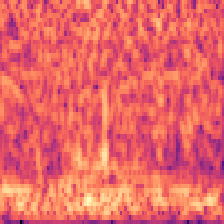

In [7]:
import glob
import os

def get_list_of_files(source_path:str):
	train_files= glob.glob(source_path+'train*.png')
	train_files = [(int(i[len(source_path)+5:-4]), i) for i in glob.glob(source_path+'train*.png')]
	train_files.sort()
	return train_files

# Open images
from PIL import Image 
# folder = './100-samples'
folder = './train_png'
files = get_list_of_files(f'{folder}/')

img = Image.open(files[0][1])
print(img.size)
img
